### Goal ###
Curate 1.88 million wild fire dataset from [USDA Research Data Archive](https://www.fs.usda.gov/rds/archive/catalog/RDS-2013-0009.4). Discard fires which occured outside of California.

In [2]:
import sys
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
con = sqlite3.connect('../data/USDA_wildfire_data/FPA_FOD_20170508.sqlite')
fires = pd.read_sql_query("SELECT * from fires", con)

LOTS of data in here, lets take a look at the column headers.

In [4]:
list(fires.columns.values)

['OBJECTID',
 'FOD_ID',
 'FPA_ID',
 'SOURCE_SYSTEM_TYPE',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_AGENCY',
 'NWCG_REPORTING_UNIT_ID',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT',
 'SOURCE_REPORTING_UNIT_NAME',
 'LOCAL_FIRE_REPORT_ID',
 'LOCAL_INCIDENT_ID',
 'FIRE_CODE',
 'FIRE_NAME',
 'ICS_209_INCIDENT_NUMBER',
 'ICS_209_NAME',
 'MTBS_ID',
 'MTBS_FIRE_NAME',
 'COMPLEX_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'DISCOVERY_TIME',
 'STAT_CAUSE_CODE',
 'STAT_CAUSE_DESCR',
 'CONT_DATE',
 'CONT_DOY',
 'CONT_TIME',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'OWNER_CODE',
 'OWNER_DESCR',
 'STATE',
 'COUNTY',
 'FIPS_CODE',
 'FIPS_NAME',
 'Shape']

Not sure about the format of the shape column, that one might be important later on. Lets push ahead with the minimum. First get only fires in California.

In [11]:
fires['Shape'][0]

b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0\xe0\xc8l\x98\xba\x04D@\xe8d\xc2\x92_@^\xc0\xe0\xc8l\x98\xba\x04D@|\x01\x00\x00\x00\xe8d\xc2\x92_@^\xc0\xe0\xc8l\x98\xba\x04D@\xfe'

In [10]:
list(fires['Shape'][0])
#output_numbers = list(input_bytes)

[0,
 1,
 173,
 16,
 0,
 0,
 232,
 100,
 194,
 146,
 95,
 64,
 94,
 192,
 224,
 200,
 108,
 152,
 186,
 4,
 68,
 64,
 232,
 100,
 194,
 146,
 95,
 64,
 94,
 192,
 224,
 200,
 108,
 152,
 186,
 4,
 68,
 64,
 124,
 1,
 0,
 0,
 0,
 232,
 100,
 194,
 146,
 95,
 64,
 94,
 192,
 224,
 200,
 108,
 152,
 186,
 4,
 68,
 64,
 254]

In [14]:
fires = fires[fires.STATE == 'CA']
fires['Shape'][0]
list(fires['Shape'][2])

[0,
 1,
 173,
 16,
 0,
 0,
 208,
 165,
 160,
 87,
 19,
 47,
 94,
 192,
 80,
 187,
 102,
 44,
 249,
 125,
 67,
 64,
 208,
 165,
 160,
 87,
 19,
 47,
 94,
 192,
 80,
 187,
 102,
 44,
 249,
 125,
 67,
 64,
 124,
 1,
 0,
 0,
 0,
 208,
 165,
 160,
 87,
 19,
 47,
 94,
 192,
 80,
 187,
 102,
 44,
 249,
 125,
 67,
 64,
 254]

Now grab the minimum relevent columns.

In [8]:
fires = fires[['LATITUDE','LONGITUDE', 'DISCOVERY_DATE']]
fires.columns = ['lat', 'lon', 'date']
fires

,lat,long,date
0,40.036944,-121.005833,2453403.5
1,38.933056,-120.404444,2453137.5
2,38.984167,-120.735556,2453156.5
3,38.559167,-119.913333,2453184.5
4,38.559167,-119.933056,2453184.5
...,...,...,...
1880460,40.481637,-122.389375,2457291.5
1880461,37.617619,-120.938570,2457300.5
1880462,37.617619,-120.938570,2457144.5
1880463,37.672235,-120.898356,2457309.5


So apparently, the date column is julian date format?! Thanks Sarah!

In [9]:
fires['date'] = pd.to_datetime(fires['date'], unit = 'D', origin = 'julian')
fires.sort_values(by=['date'])

,lat,long,date
191959,33.166700,-116.634200,1992-01-01
1136835,33.663889,-116.171944,1992-01-01
49226,38.205000,-120.335000,1992-01-01
1136837,33.678056,-116.171944,1992-01-02
1136836,33.896111,-116.990000,1992-01-02
...,...,...,...
1872147,33.808482,-117.358313,2015-12-30
1871985,32.701123,-117.007382,2015-12-31
1872288,39.173027,-121.057377,2015-12-31
1872285,35.050000,-120.166666,2015-12-31


In [10]:
len(fires)

189550

About 10% of our 1.88 million fires happened in California. Lets take a look.

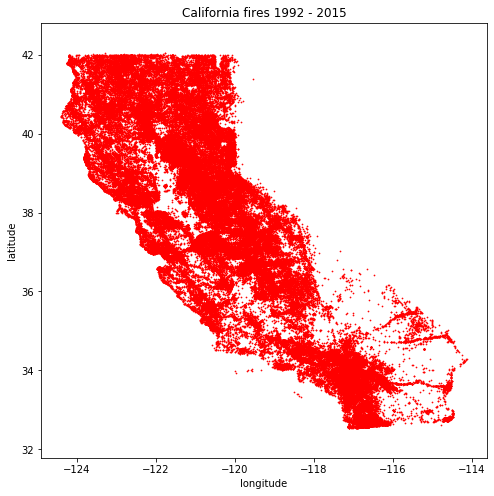

In [11]:
plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(x=fires['long'], y=fires['lat'], color='red', s=0.5)
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('California fires 1992 - 2015')
plt.show()

In [13]:
fires.to_csv('../data/USDA_wildfire_data/california_fires.csv')

Success, looks like California!

### Next steps ###
1. ~~Cull 1.88 million wild fires dataset. The orignal data set includes fires from the whole US.~~
2. Find nearest CDEC weather monitoring station to each bin.
3. For each time step between 2011 and 2016 assign weather data to bin from nearest station
4. For each time step between 2011 and 2016 assign fire data to each bin. This includes time since most recent fire and total recoreded fires.